# Load the Iris Dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
X = iris['data']
y = iris['target']
features = iris['feature_names']

# Convert to DataFrame for convenience
df = pd.DataFrame(X, columns=features)
df['target'] = y

# Scatter Plots for Attribute Combinations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


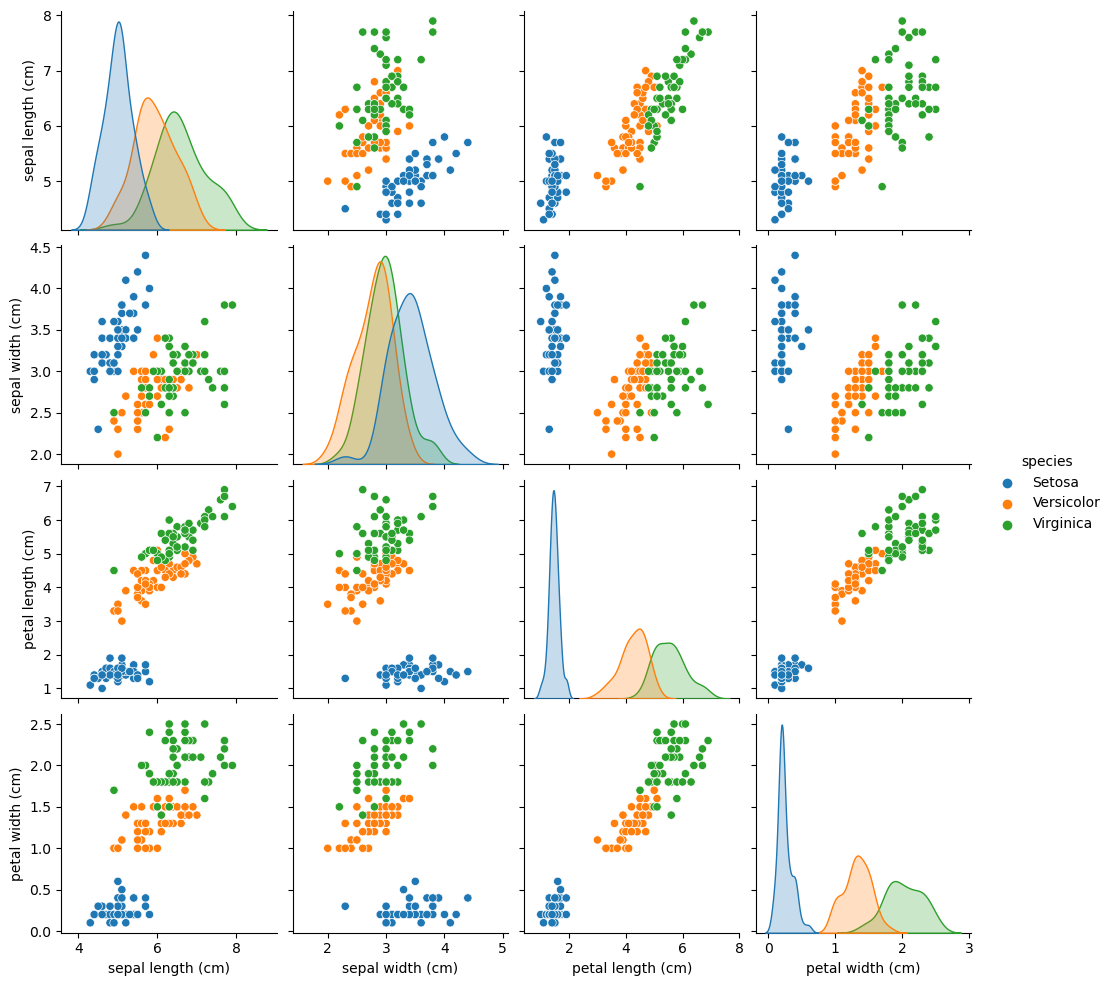

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add target labels
df['species'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Pairwise scatter plots
sns.pairplot(df, hue='species', vars=features)
plt.show()

# StandardScaler function

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (four attributes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the first few rows of the standardized data to verify
print("Standardized Data (First 5 Rows):")
print(X_scaled[:5])

Standardized Data (First 5 Rows):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# onvert Data Values to Standard Values

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the shapes of the datasets to verify
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Data Shape: (105, 4)
Testing Data Shape: (45, 4)
Training Labels Shape: (105,)
Testing Labels Shape: (45,)


# Split Dataset into Training and Testing

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training dataset
log_reg.fit(X_train, y_train)

# Print the model's coefficients and intercept
print("Logistic Regression Model Coefficients:")
print(log_reg.coef_)
print("Intercept:", log_reg.intercept_)

Logistic Regression Model Coefficients:
[[-0.98057432  1.05153121 -1.74796806 -1.60379333]
 [ 0.48839711 -0.36379977 -0.29967424 -0.67566299]
 [ 0.49217721 -0.68773145  2.0476423   2.27945633]]
Intercept: [-0.30492143  1.82344051 -1.51851908]


# Fit Logistic Regression Model on the Training Dataset

In [6]:
y_pred_log = log_reg.predict(X_test)

# Print the predictions
print("Predicted Classes:", y_pred_log)

# Print the actual test labels for comparison
print("Actual Classes:", y_test)

Predicted Classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual Classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


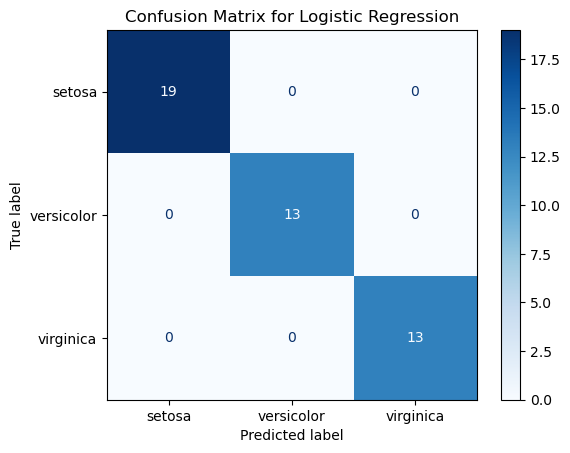

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [8]:
from sklearn.metrics import classification_report

# Generate a detailed classification report
report = classification_report(y_test, y_pred_log, target_names=iris.target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict using the KNN model
y_pred_knn = knn.predict(X_test)

# Accuracy of KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 1.00


In [10]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict using the Naive Bayes model
y_pred_nb = nb.predict(X_test)

# Accuracy of Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Naive Bayes Accuracy: 0.98


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict using the Decision Tree model
y_pred_dt = dt.predict(X_test)

# Accuracy of Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


Decision Tree Accuracy: 1.00


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = rf.predict(X_test)

# Accuracy of Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 1.00


In [13]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

# Predict using the SVC model
y_pred_svc = svc.predict(X_test)

# Accuracy of SVC
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.2f}")


SVC Accuracy: 1.00


In [14]:
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_knn,
    "Naive Bayes": accuracy_nb,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "SVC": accuracy_svc,
}

# Print as a table
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}")

Logistic Regression: 1.00
KNN: 1.00
Naive Bayes: 0.98
Decision Tree: 1.00
Random Forest: 1.00
SVC: 1.00


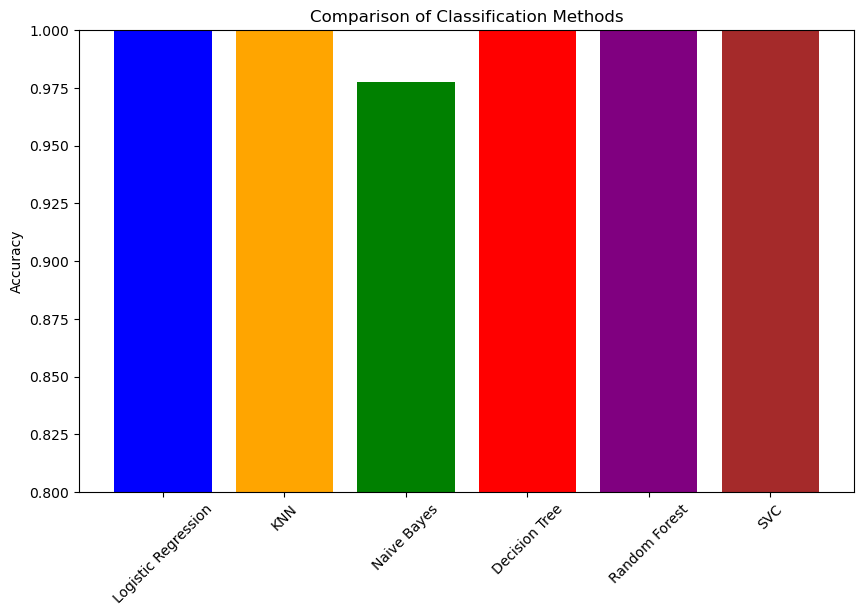

In [15]:
import matplotlib.pyplot as plt

# Bar chart for accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Methods')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Zooming in to make differences visible
plt.show()
